In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [2]:
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-26/'
sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/1-5mm/'

In [3]:
target = 'train_val_values.json'
embedding = 'ACC_1'
label = 'Right_PCS'
selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]

In [4]:
metric = 'train_val_auc'
#metric = 'train_val_total_balanced_accuracy'

In [9]:
#models = ['17-16-30_112', '18-37-28_0', '18-37-28_1', '18-37-28_2', '18-37-28_3', '18-37-28_4']
#models = ['14-35-49_163', '21-38-51_0', '21-38-51_1', '21-38-51_2', '21-38-51_3']
models = ['11-45-15_0', '11-45-15_1', '11-45-15_2', '11-45-15_3', '11-45-15_4']
epochs = [k for k in range(0, 250, 10)]
#models = ['random_all_keep_bottom_5']
#epochs = [k for k in range(0, 250)]
dict_perf = {model : [] for model in models}
dict_perf['epoch'] = []
for model in models:
    for epoch in epochs:
        for directory in selected_models_dirs:
            if ('epoch'+str(epoch)+'_' in directory) and (model in directory):
                with open(os.path.join(directory,target), 'r') as f:
                    perf = json.load(f)
                if isinstance(perf[metric], float):
                    value = perf[metric]
                else:
                    value = perf[metric][0]
                dict_perf['epoch'].append(epoch)
                dict_perf[model].append(value)
                

In [10]:
len(dict_perf['epoch'])

125

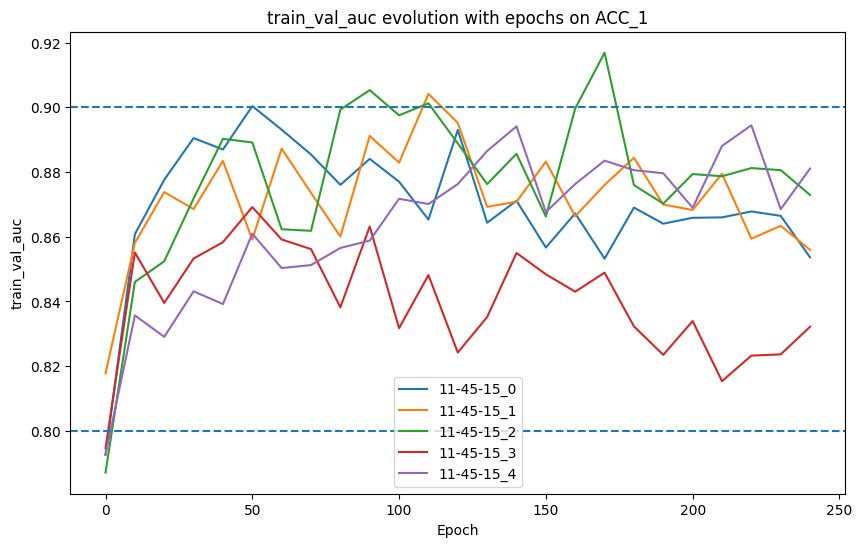

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
for model in models:
    x, y = epochs, dict_perf[model]
    plt.plot(x, y, label=model)
plt.axline((0, 0.90), (1, 0.90), linestyle='--')
plt.axline((0, 0.80), (1, 0.80), linestyle='--')
plt.xlabel('Epoch')
plt.ylabel(metric)
plt.legend()
plt.title(f'{metric} evolution with epochs on {embedding}')
plt.show()